<a href="https://colab.research.google.com/github/sudhir2016/Alexa/blob/master/MSI_ISRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

     |████████████████████████████████| 18.2MB 1.3MB/s 


In [131]:
! pip install geopandas

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 10.9MB 17.5MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [132]:
import geopandas as gpd

In [9]:
import rasterio as rio
import numpy as np

In [3]:
img=rio.open('/content/SM_SMAP_I_20200823_20200825.tif')

In [103]:
img_aug=rio.open('/content/SM_SMAP_I_20200824_20200826.tif')

In [104]:
img_may=rio.open('/content/SM_SMAP_I_20200522_20200524.tif')

In [87]:
img.shape

(256, 272)

In [ ]:
img.meta

In [5]:
 from rasterio.plot import show

In [122]:
from matplotlib import pyplot as plt
import matplotlib

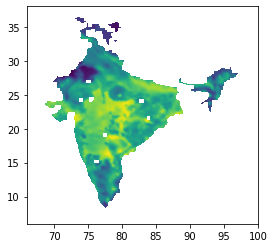

In [108]:
show(img_aug)

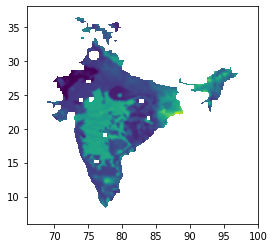

In [109]:
show(img_may)

Text(0.5, 1.0, '26.8.20')

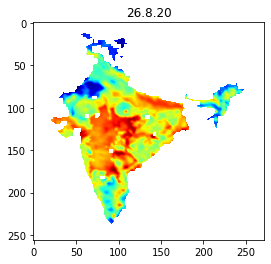

In [128]:
plt.imshow(img_aug.read(1),cmap='jet')
plt.title('26.8.20')

Text(0.5, 1.0, '24.5.20')

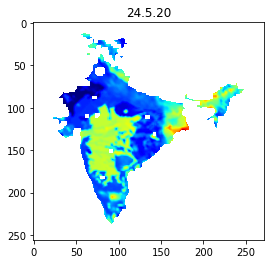

In [129]:
pyplot.imshow(img_may.read(1),cmap='jet')
plt.title('24.5.20')

In [ ]:
pyplot.imshow(img_may.read(1),cmap='jet')

In [90]:
img1=img.read()

In [91]:
img1.shape

(1, 256, 272)

In [92]:
print(img1)

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]


In [93]:
img2=np.nan_to_num(img1)

In [94]:
print(img2)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [95]:
img3=img2[img2 !=0]

In [96]:
print(img3)

[0.2473222  0.23659892 0.24588744 ... 0.21639863 0.2771056  0.25404003]


In [101]:
np.min(img3)

0.058042396

In [99]:
np.max(img3)

0.50467044

In [98]:
len(img3)

16067

In [102]:
s=sum(img3)/len(img3)
print(s)

0.2029596513893432


In [133]:
plot=gpd.read_file('plot.geojson')

In [135]:
crs=img.crs
print(crs)

EPSG:4326


In [136]:
plot1=plot.to_crs({'init': crs})

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [145]:
geo=polygon.geometry
print(geo)

0    POLYGON ((78.00000 21.00000, 78.00000 22.00000...
Name: geometry, dtype: geometry


In [ ]:
from shapely.geometry import Polygon

lat_point_list = [21, 22, 22,21]
lon_point_list = [78,78,80,80]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

In [139]:
from rasterio import mask

In [146]:
with rio.open("/content/SM_SMAP_I_20200824_20200826.tif") as src:
    out_image, out_transform = rio.mask.mask(src,geo,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [147]:
print(out_image)

[[[0.44012427 0.4437288  0.4469288  0.4199754  0.40542182 0.39115036
   0.40432224 0.40662274 0.40991333 0.4072769  0.4108048  0.41917962
   0.4422125  0.47014177 0.49072772 0.50265145]
  [0.44166222 0.44689083 0.44865337 0.40869004 0.37814707 0.3613975
   0.37243858 0.37721565 0.37361795 0.37487546 0.39058867 0.40919015
   0.44237489 0.4718246  0.49453405 0.50839376]
  [0.43713441 0.44068387 0.44284552 0.40464252 0.37449288 0.3581566
   0.35666648 0.3519334  0.34197196 0.36818516 0.40612894 0.43962675
   0.46558532 0.48572105 0.50233746 0.5147296 ]
  [0.4332832  0.436833   0.43979925 0.41468072 0.38928047 0.38661814
   0.38736564 0.38828504 0.38017532 0.4093309  0.4508551  0.47992572
   0.49816263 0.50635767 0.51418346 0.5166433 ]
  [0.43063125 0.43319476 0.43644038 0.4202719  0.39694926 0.3980738
   0.4055766  0.41920185 0.42079696 0.44968194 0.48114634 0.49989644
   0.5058135  0.51134163 0.51112175 0.50635433]
  [0.42333817 0.4108414  0.39879164 0.39174688 0.37400833 0.39022133
   0